# Polynomial fitting

Our dataset is a set of {(x_i,y_i)} where y_i is generated as:

                  y_i = f(x_i) + eta_i

We use the function:

                  f(x) = 2x^2 + 3x + 4

The noise eta is Guassian

In [6]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model
from sklearn import train_test_split 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
#seed random generator for repeteable results
np.random.seed(29072000)

## Number of data points vs. Error.

In [7]:
#Create points for a 3 grade polynomial depending on the size of the sample
N = [i for i in range(10,1000,10)]

sigma_train=1

#Create empty arrays to store the errors
mae = []
mse = []
rmse = []
r2 = []

for n in N:
    
    # Generate x values between 0 and 1
    x = np.linspace(0.05,0.95,n)
    # Generate random noise
    s = sigma_train*np.random.randn(n) #"Return a sample (or samples) from the “standard normal” distribution." https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html

    # Generate y and y_i (with noise) values
    y = 2*(x)**2 + 3*x + 4
    y_i = 2*(x)**2 + 3*x + 4 + s 

    #create the Polynomial Regression
    poly3 = PolynomialFeatures(degree=3)
    X = poly3.fit_transform(x[:,np.newaxis]) #Calculate x^0, x^1,x^2 and x^3 because is a 3-grade polynomial
    clf3 = linear_model.LinearRegression() #Creates the model
    clf3.fit(X,y_i) #adjust the parameters

    #Calculate the value of the polynomial in the X values
    predictions = clf3.predict(X)

    # Calculate errors
    mae_i = mean_absolute_error(y, predictions)
    mse_i = mean_squared_error(y, predictions)
    rmse_i = np.sqrt(mse_i)
    r2_i = r2_score(y, predictions)

    #Store errors
    mae.append(mae_i)
    mse.append(mse_i)
    rmse.append(rmse_i)
    r2.append(r2_i)


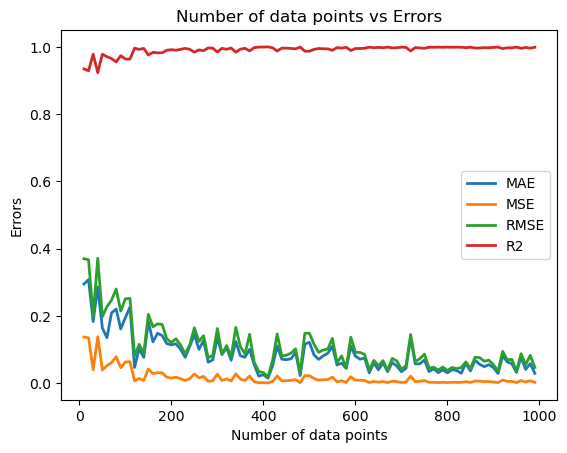

In [8]:
#Create graph
plt.plot(N, mae,label='MAE', linewidth=2)
plt.plot(N, mse,label='MSE', linewidth=2)
plt.plot(N, rmse,label='RMSE',linewidth=2)
plt.plot(N, r2,label='R2',linewidth=2)

plt.xlabel('Number of data points')
plt.ylabel('Errors')
plt.title('Number of data points vs Errors')
plt.legend()
plt.show()

## Model complexity vs. Error.

In [9]:
#Create points for a 3 grade polynomial for a 100 entrance dataset
N = 100

sigma_train=1

#Create array with the grades of the polynomial
G = [i for i in range(1,N)]

#Create empty arrays to store the errors
mae = []
mse = []
rmse = []
r2 = []

for g in G:
    
    # Generate x values between 0 and 1
    x = np.linspace(0.05,0.95,N)
    # Generate random noise
    s = sigma_train*np.random.randn(N) 

    # Generate y and y_i (with noise) values
    y = 2*(x)**2 + 3*x + 4
    y_i = 2*(x)**2 + 3*x + 4 + s 

    #create the Polynomial Regression
    polyg = PolynomialFeatures(degree=g)
    X = polyg.fit_transform(x[:,np.newaxis]) #Calculate x^0, x^1,x^2,...,x^g because is a g-grade polynomial
    clfg = linear_model.LinearRegression() #Creates the model
    clfg.fit(X,y_i) #adjust the parameters

    #Calculate the value of the polynomial in the X values
    predictions = clfg.predict(X)

    # Calculate errors
    mae_i = mean_absolute_error(y, predictions)
    mse_i = mean_squared_error(y, predictions)
    rmse_i = np.sqrt(mse_i)
    r2_i = r2_score(y, predictions)

    #Store errors
    mae.append(mae_i)
    mse.append(mse_i)
    rmse.append(rmse_i)
    r2.append(r2_i)

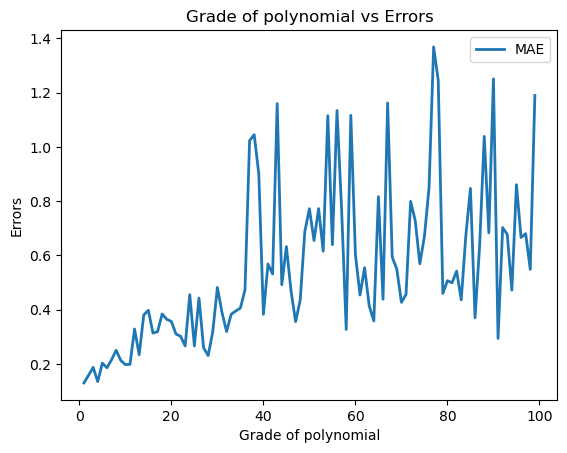

In [10]:
#Create graph
plt.plot(G, mae,label='MAE', linewidth=2)
#plt.plot(G, mse,label='MSE', linewidth=2)
#plt.plot(G, rmse,label='RMSE',linewidth=2)
#plt.plot(G, r2,label='R2',linewidth=2)

plt.xlabel('Grade of polynomial')
plt.ylabel('Errors')
plt.title('Grade of polynomial vs Errors')
plt.legend()
plt.show()

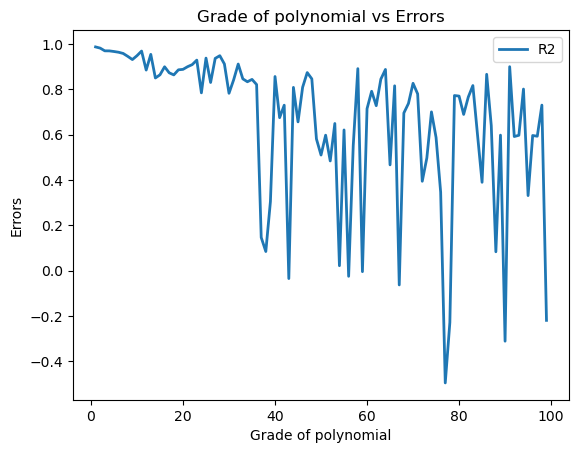

In [11]:
plt.plot(G, r2,label='R2',linewidth=2)

plt.xlabel('Grade of polynomial')
plt.ylabel('Errors')
plt.title('Grade of polynomial vs Errors')
plt.legend()
plt.show()